In [1]:
import numpy as np
import pandas as pd
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)


NumPy version: 2.1.1
Pandas version: 2.2.2


In [2]:
file_path319 = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM\A319_final.pkl"
file_path320 = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM\A320_final.pkl"
file_path321 = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM\A321_final.pkl"
file_path332 = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM\A332_final.pkl"

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

In [3]:
import matplotlib.pyplot as plt

# Path 
base_path = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM"

# Filenames of the .pkl files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Check to understand its structure
print(aircraft_data['A319_final.pkl'].head())

            time  timestep  maxtimestep  icao24  callsign  baroaltitude  \
7005  1504243026         0          885     181      8849     99.621777   
7006  1504243041        15          885     181      8849    267.971309   
7007  1504243056        30          885     181      8849    434.539718   
7008  1504243071        45          885     181      8849    594.686904   
7009  1504243086        60          885     181      8849    770.119368   

            lat       lon   velocity  vertratecorr  segment  modeltype  \
7005  48.726105  2.334172  77.234279     13.004800   370312          5   
7006  48.721588  2.320780  75.300785     11.054080   370312          5   
7007  48.716908  2.306887  76.053038     11.054080   370312          5   
7008  48.712025  2.292953  77.104374     11.050637   370312          5   
7009  48.706743  2.279820  77.058491     10.858069   370312          5   

      operator  fromICAO  toICAO  distance_from_dep  trip_distance  \
7005         6        58      76  

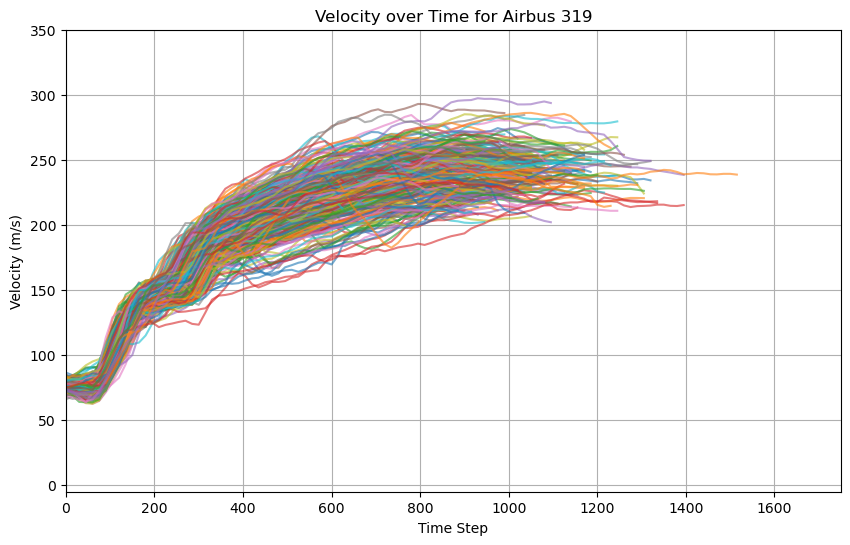

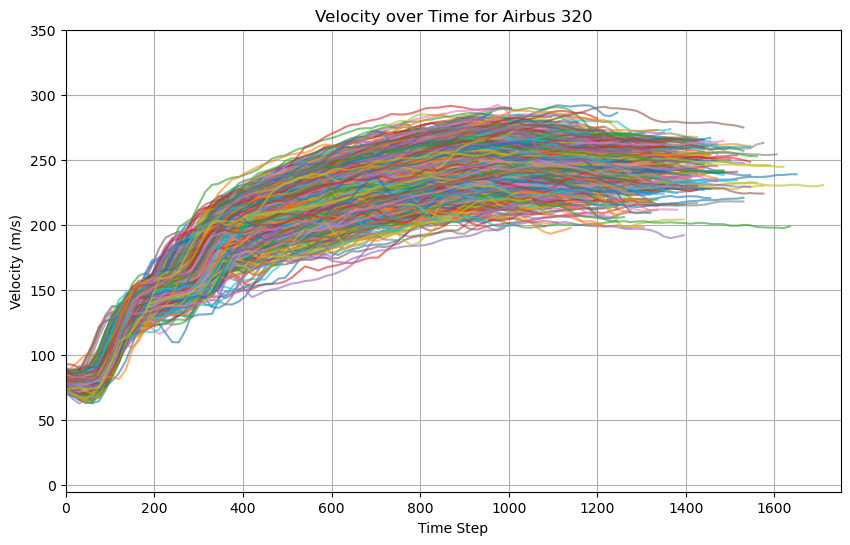

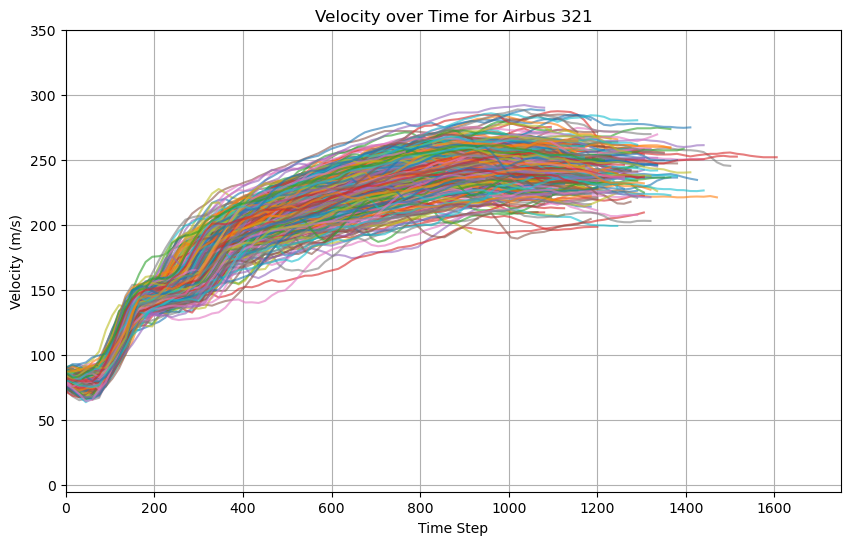

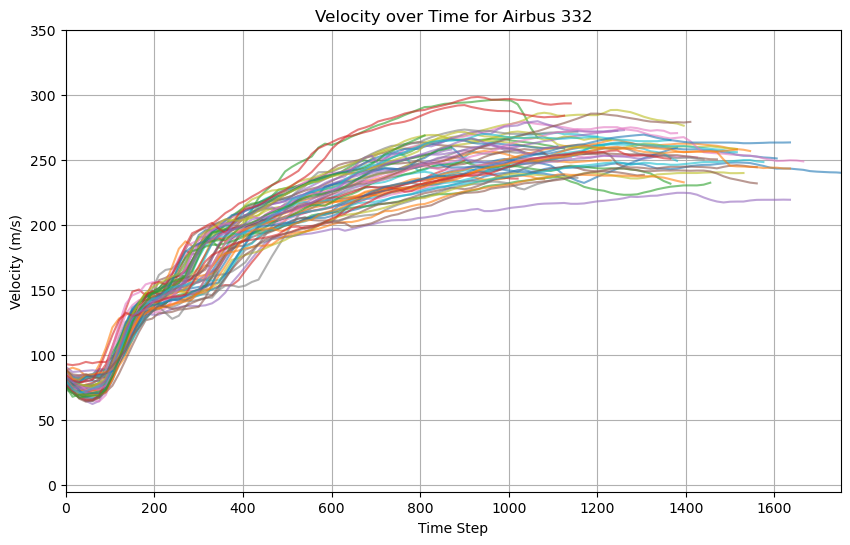

In [4]:
# Function to plot velocity over time
def plot_velocity(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['velocity'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Velocity over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 1750)  
y_limits = (-5, 350)

# Plot for each aircraft
plot_velocity(df319, 'Airbus 319', x_limits, y_limits)
plot_velocity(df320, 'Airbus 320', x_limits, y_limits)
plot_velocity(df321, 'Airbus 321', x_limits, y_limits)
plot_velocity(df332, 'Airbus 332', x_limits, y_limits)

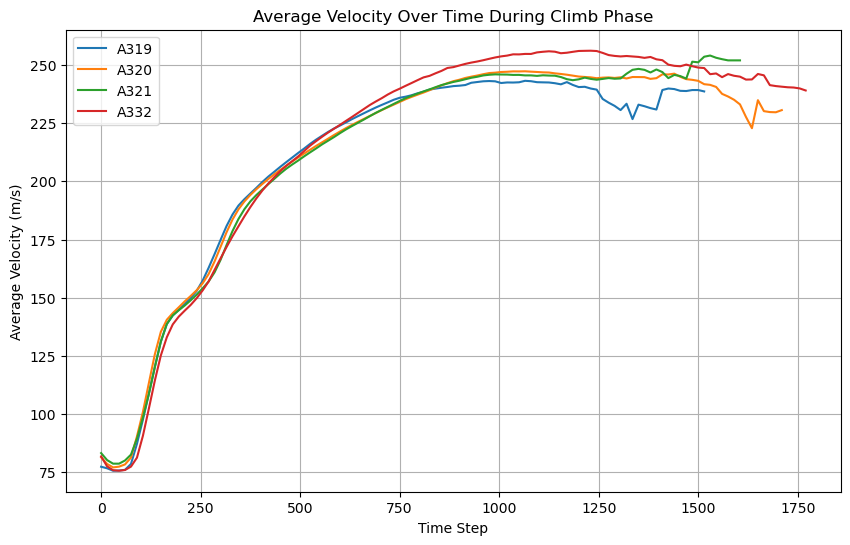

In [5]:
# Path
base_path = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM"

# Filenames of the files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}
airplane_models = ['A319', 'A320', 'A321', 'A332']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    average_velocity = df.groupby('timestep')['velocity'].mean()  # Calculate average velocity over time
    
    # Plotting
    plt.plot(average_velocity, label=model.replace('.pkl', ''))  # Clean up model name for the label

plt.title('Average Velocity Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()


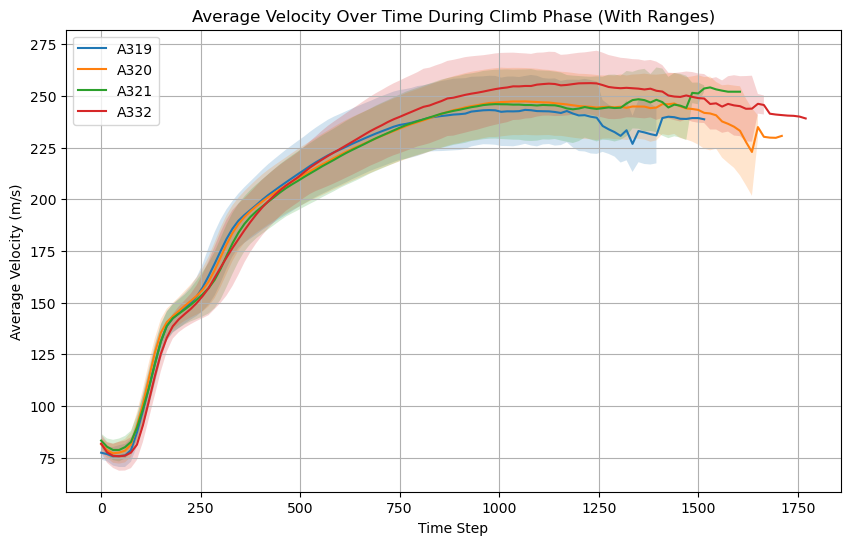

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path
base_path = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM"

# Filenames of the files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}
airplane_models = ['A319', 'A320', 'A321', 'A332']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    
    # Group by timestep and calculate statistics
    grouped = df.groupby('timestep')['velocity']
    average_altitude = grouped.mean()  # Mean altitude
    std_altitude = grouped.std()       # Standard deviation of altitude
    min_altitude = grouped.min()       # Minimum altitude
    max_altitude = grouped.max()       # Maximum altitude
    n = grouped.count()                # Number of observations per timestep
    sem = std_altitude / np.sqrt(n)    # Standard Error of the Mean (SEM)
    ci95 = 1.96 * sem                  # 95% Confidence Interval
    
    # Plot mean with corridors
    plt.plot(average_altitude, label=model.replace('.pkl', ''))  # Mean line
    
    # Fill the corridors for standard deviation, min-max, and 95% CI
    plt.fill_between(average_altitude.index, 
                      average_altitude - std_altitude, 
                      average_altitude + std_altitude, 
                      alpha=0.2)  # Standard deviation range

    # plt.fill_between(average_altitude.index, 
    #                   min_altitude, 
    #                   max_altitude, 
    #                   alpha=0.1)  # Min-max range

    # plt.fill_between(average_altitude.index, 
    #                  average_altitude - ci95, 
    #                  average_altitude + ci95, 
    #                  alpha=0.3)  # 95% CI range

# Add labels and other plot details
plt.title('Average Velocity Over Time During Climb Phase (With Ranges)')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (m/s)')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Velocity vs Time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

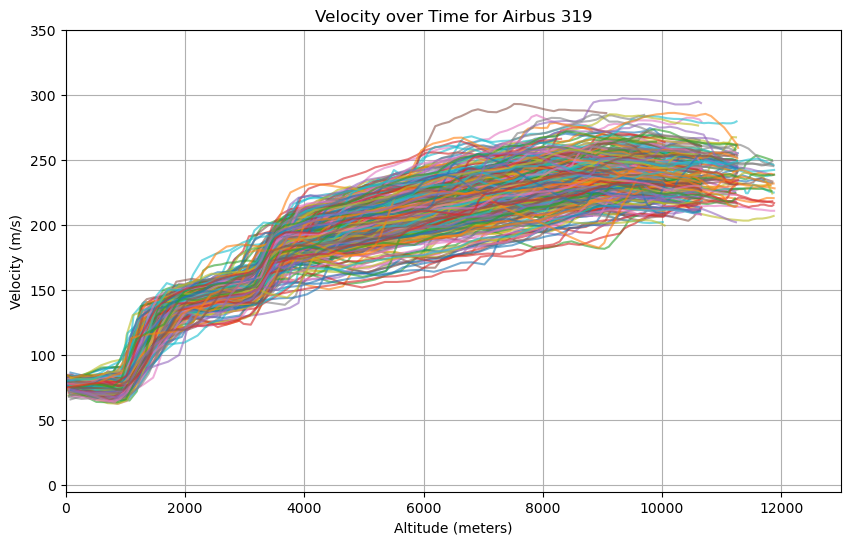

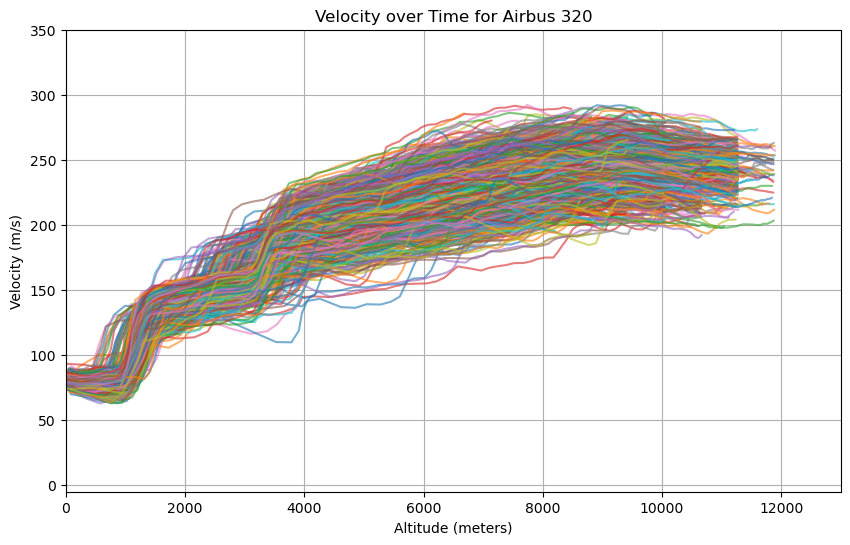

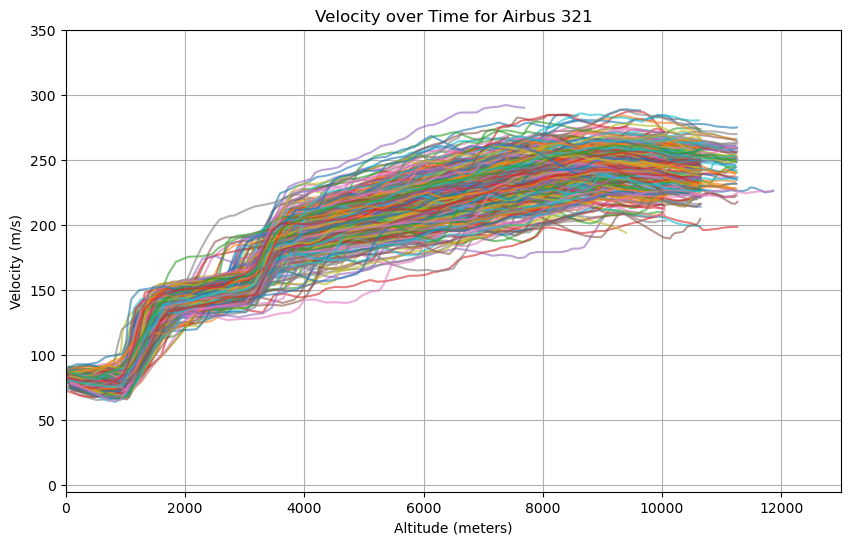

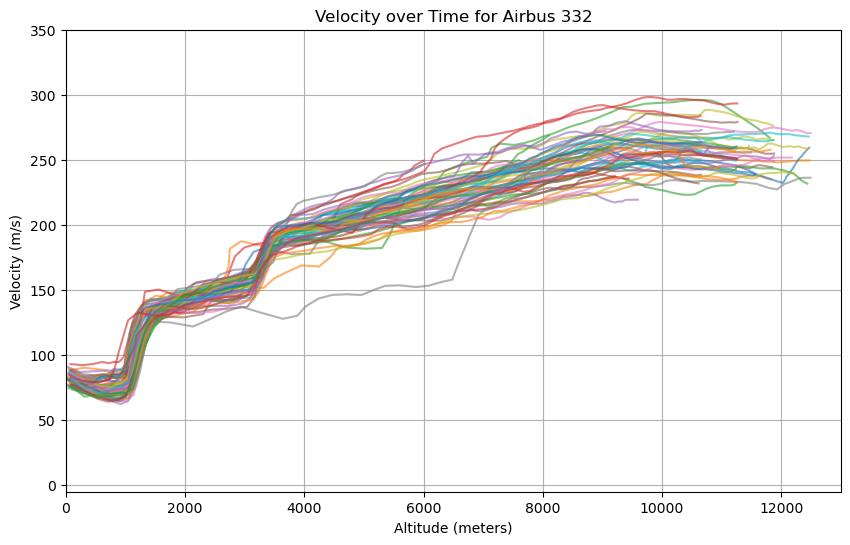

In [7]:
def plot_velocity(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['baroaltitude'], group['velocity'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Velocity over Time for {aircraft_model}')
    plt.xlabel('Altitude (meters)')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 13000)  
y_limits = (-5, 350)

# Plot for each aircraft
plot_velocity(df319, 'Airbus 319', x_limits, y_limits)
plot_velocity(df320, 'Airbus 320', x_limits, y_limits)
plot_velocity(df321, 'Airbus 321', x_limits, y_limits)
plot_velocity(df332, 'Airbus 332', x_limits, y_limits)

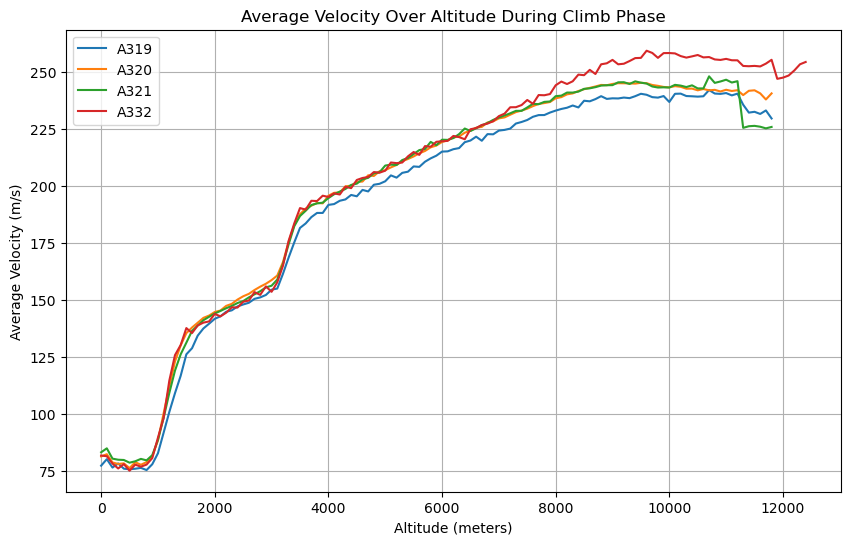

In [8]:
# Path
base_path = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM"

# Filenames of the files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}
airplane_models = ['A319', 'A320', 'A321', 'A332']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    df['baroaltitude_int'] = df['baroaltitude'] // 100 * 100
    average_velocity = df.groupby('baroaltitude_int')['velocity'].mean()  # Calculate average velocity over time
    
    # Plotting
    plt.plot(average_velocity, label=model.replace('.pkl', ''))  # Clean up model name for the label

plt.title('Average Velocity Over Altitude During Climb Phase')
plt.xlabel('Altitude (meters)')
plt.ylabel('Average Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()

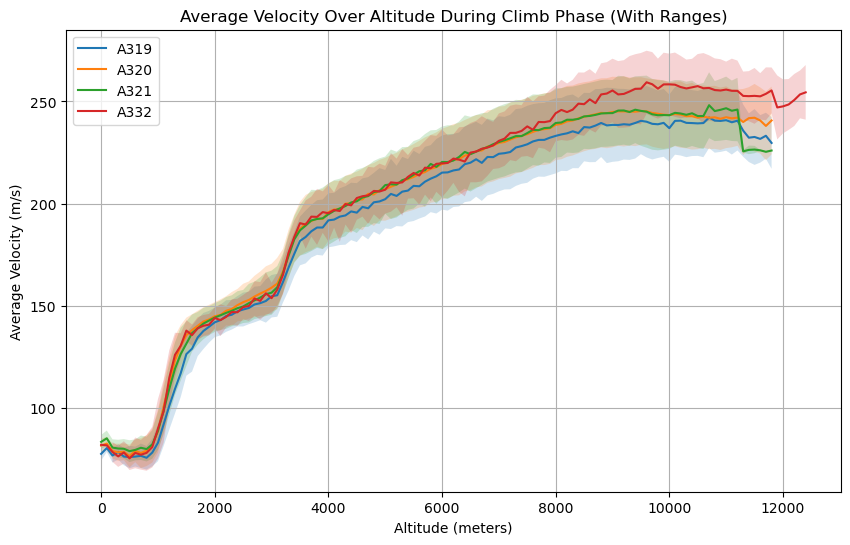

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path
base_path = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM"

# Filenames of the files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}
airplane_models = ['A319', 'A320', 'A321', 'A332']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    
    # Group by timestep and calculate statistics
    df['baroaltitude_int'] = df['baroaltitude'] // 100 * 100
    #df319_avg_climb_rate = df319.groupby('baroaltitude_int')['velocity'].mean().reset_index()
    grouped = df.groupby('baroaltitude_int')['velocity']
    average_altitude = grouped.mean()  # Mean altitude
    std_altitude = grouped.std()       # Standard deviation of altitude
    min_altitude = grouped.min()       # Minimum altitude
    max_altitude = grouped.max()       # Maximum altitude
    n = grouped.count()                # Number of observations per timestep
    sem = std_altitude / np.sqrt(n)    # Standard Error of the Mean (SEM)
    ci95 = 1.96 * sem                  # 95% Confidence Interval
    
    # Plot mean with corridors
    plt.plot(average_altitude, label=model.replace('.pkl', ''))  # Mean line
    
    # Fill the corridors for standard deviation, min-max, and 95% CI
    plt.fill_between(average_altitude.index, 
                      average_altitude - std_altitude, 
                      average_altitude + std_altitude, 
                      alpha=0.2)  # Standard deviation range

    # plt.fill_between(average_altitude.index, 
    #                   min_altitude, 
    #                   max_altitude, 
    #                   alpha=0.1)  # Min-max range

    # plt.fill_between(average_altitude.index, 
    #                  average_altitude - ci95, 
    #                  average_altitude + ci95, 
    #                  alpha=0.3)  # 95% CI range

# Add labels and other plot details
plt.title('Average Velocity Over Altitude During Climb Phase (With Ranges)')
plt.xlabel('Altitude (meters)')
plt.ylabel('Average Velocity (m/s)')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Velocity vs Altitude.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Altitude over Time**

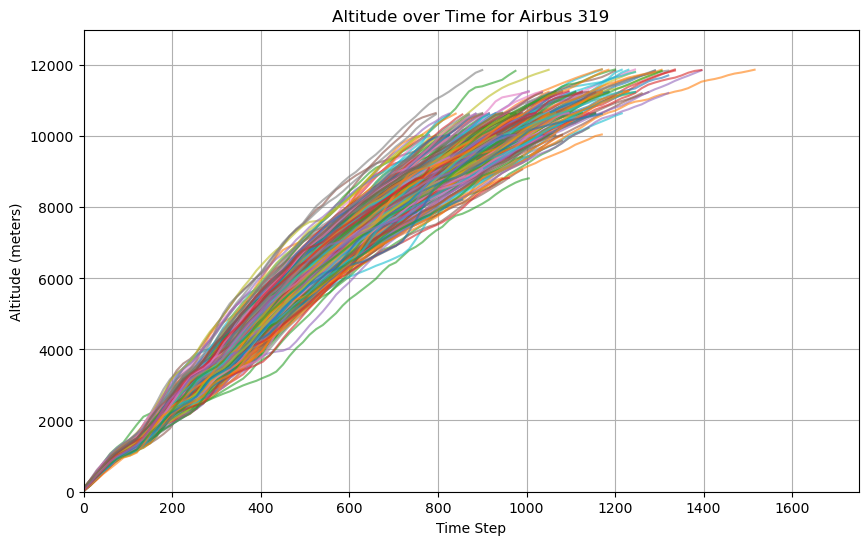

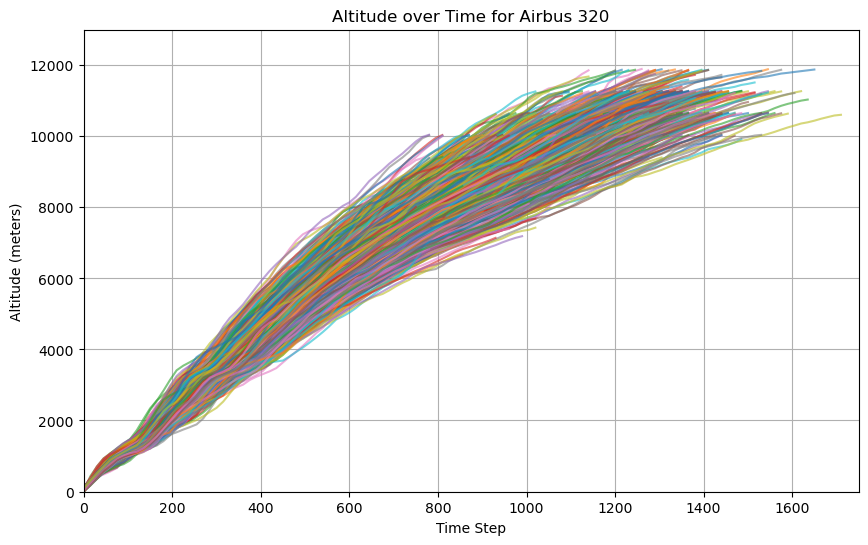

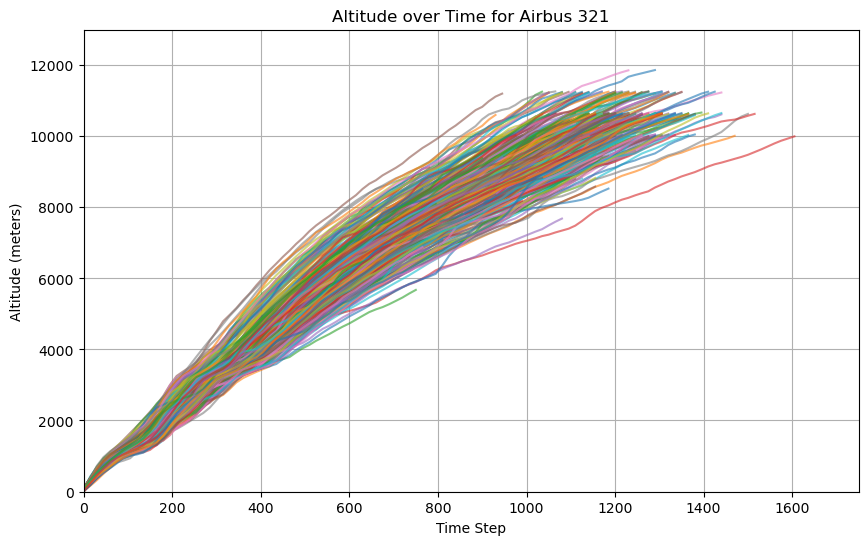

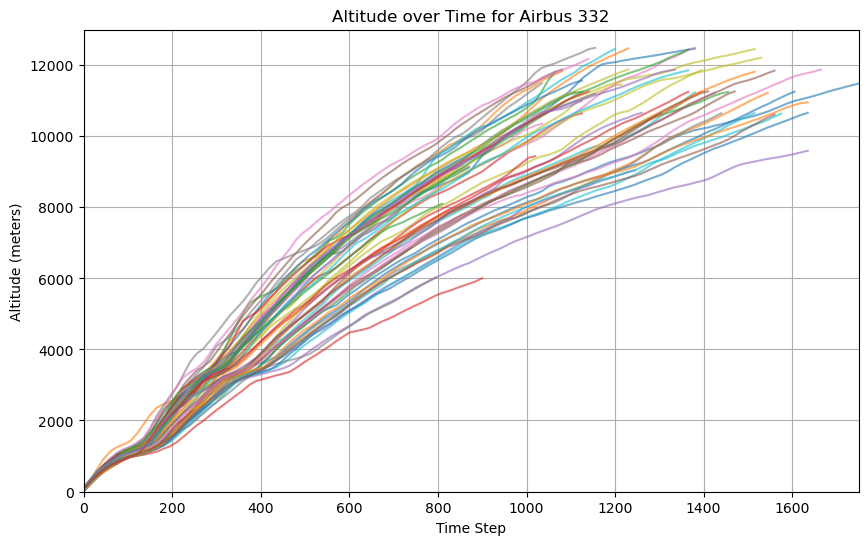

In [10]:
# Function to plot altitude over time
def plot_velocity(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['baroaltitude'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Altitude over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Altitude (meters)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 1750)  
y_limits = (-5, 13000)

# Plot for each aircraft
plot_velocity(df319, 'Airbus 319', x_limits, y_limits)
plot_velocity(df320, 'Airbus 320', x_limits, y_limits)
plot_velocity(df321, 'Airbus 321', x_limits, y_limits)
plot_velocity(df332, 'Airbus 332', x_limits, y_limits)

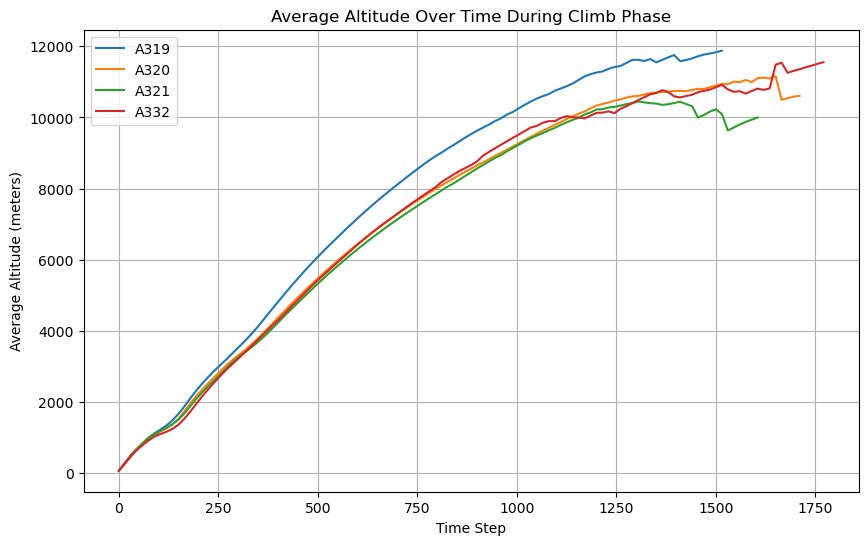

In [11]:
# Path
base_path = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM"

# Filenames of the files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}
airplane_models = ['A319', 'A320', 'A321', 'A332']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    average_altitude = df.groupby('timestep')['baroaltitude'].mean()    # Calculate average barometric altitude over time
    
    # Plotting
    plt.plot(average_altitude, label=model.replace('.pkl', ''))

plt.title('Average Altitude Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend()
plt.grid(True)
plt.show()

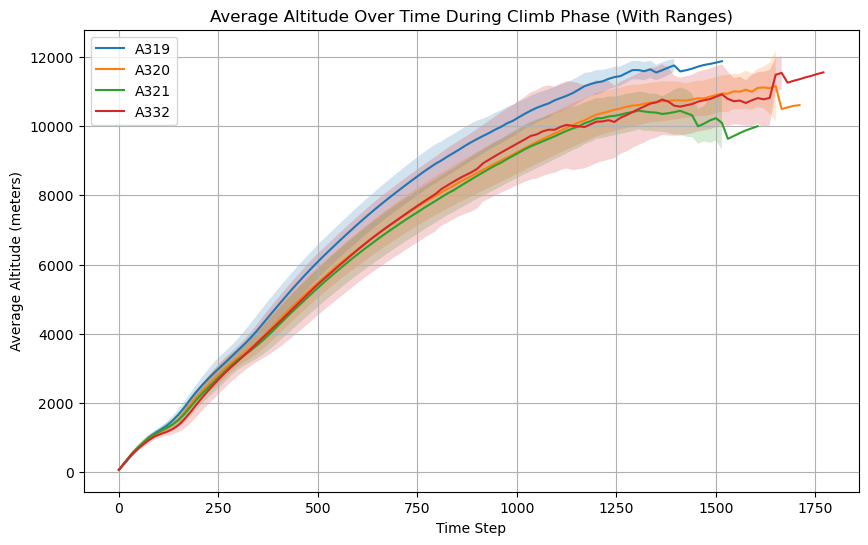

In [12]:
# Path
base_path = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM"

# Filenames of the files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}
airplane_models = ['A319', 'A320', 'A321', 'A332']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    
    # Group by timestep and calculate statistics
    grouped = df.groupby('timestep')['baroaltitude']
    average_altitude = grouped.mean()  # Mean altitude
    std_altitude = grouped.std()       # Standard deviation of altitude
    min_altitude = grouped.min()       # Minimum altitude
    max_altitude = grouped.max()       # Maximum altitude
    n = grouped.count()                # Number of observations per timestep
    sem = std_altitude / np.sqrt(n)    # Standard Error of the Mean (SEM)
    ci95 = 1.96 * sem                  # 95% Confidence Interval
    
    # Plot mean with corridors
    plt.plot(average_altitude, label=model.replace('.pkl', ''))  # Mean line
    
    # Fill the corridors for standard deviation, min-max, and 95% CI
    plt.fill_between(average_altitude.index, 
                      average_altitude - std_altitude, 
                      average_altitude + std_altitude, 
                      alpha=0.2)  # Standard deviation range

    # plt.fill_between(average_altitude.index, 
    #                   min_altitude, 
    #                   max_altitude, 
    #                   alpha=0.1)  # Min-max range

    # plt.fill_between(average_altitude.index, 
    #                  average_altitude - ci95, 
    #                  average_altitude + ci95, 
    #                  alpha=0.3)  # 95% CI range

# Add labels and other plot details
plt.title('Average Altitude Over Time During Climb Phase (With Ranges)')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Altitude vs Time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

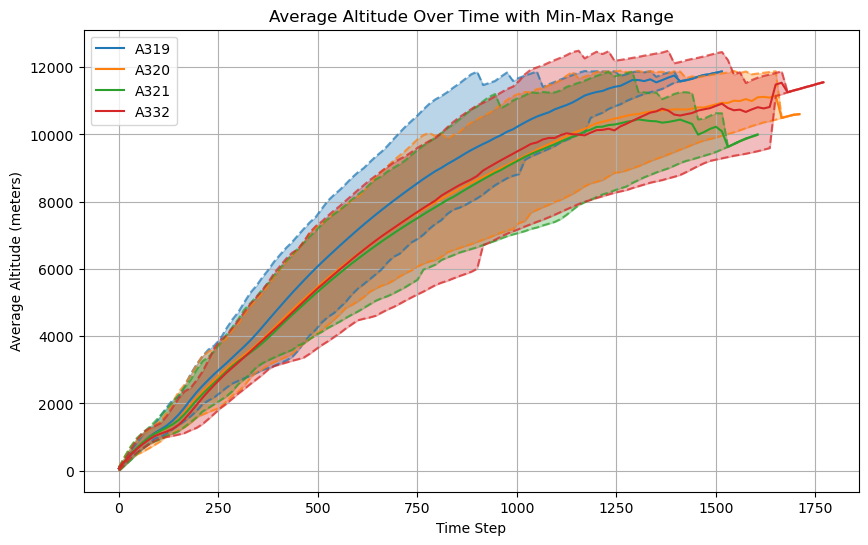

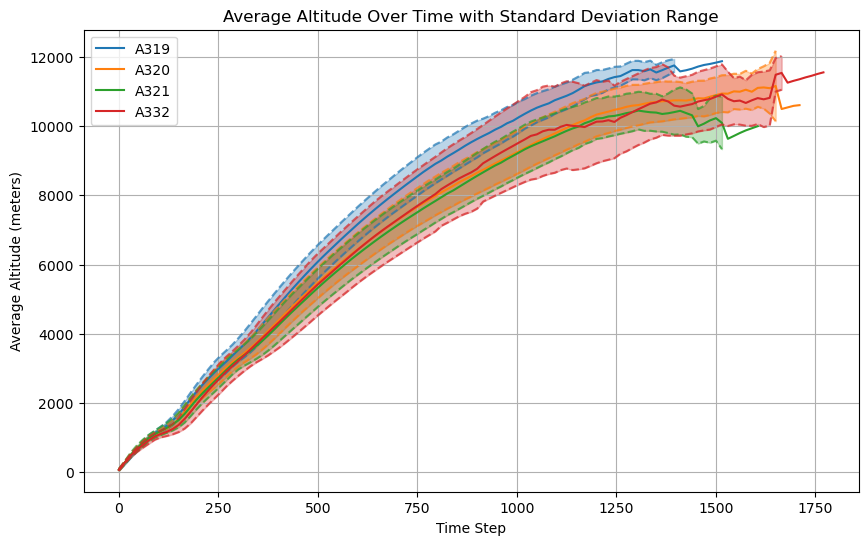

In [13]:
# Path
base_path = r"C:\Users\bryan\OneDrive - Delft University of Technology\Master TIL\Year 1\TIL Programming\Group Project\TIL6022 TIL Python Programming (202425 Q1) - 9232024 - 1022 AM"

# Filenames of the files
filenames = ['A319_final.pkl', 'A320_final.pkl', 'A321_final.pkl', 'A332_final.pkl']
aircraft_data = {}
airplane_models = ['A319', 'A320', 'A321', 'A332']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# 1st Plot: Mean with Min-Max Corridor and Dotted Lines
plt.figure(figsize=(10, 6))
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    
    # Group by timestep and calculate statistics
    grouped = df.groupby('timestep')['baroaltitude']
    average_altitude = grouped.mean()  # Mean altitude
    min_altitude = grouped.min()       # Minimum altitude
    max_altitude = grouped.max()       # Maximum altitude
    
    # Plot mean line and get the line color
    line, = plt.plot(average_altitude, label=model.replace('.pkl', ''))  # Mean line
    color = line.get_color()  # Get the color of the mean line
    
    # Fill the corridor for Min-Max range
    plt.fill_between(average_altitude.index, 
                     min_altitude, 
                     max_altitude, 
                     alpha=0.3, color=color)  # Min-max range with the same color
    
    # Plot dotted lines at Min-Max boundaries with the same color
    plt.plot(average_altitude.index, 
             min_altitude, 
             linestyle='--', color=color, alpha=0.7)  # Min line
             
    plt.plot(average_altitude.index, 
             max_altitude, 
             linestyle='--', color=color, alpha=0.7)  # Max line

# Add labels and details
plt.title('Average Altitude Over Time with Min-Max Range')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# 2nd Plot: Mean with Standard Deviation Corridor and Dotted Lines
plt.figure(figsize=(10, 6))
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    
    # Group by timestep and calculate statistics
    grouped = df.groupby('timestep')['baroaltitude']
    average_altitude = grouped.mean()  # Mean altitude
    std_altitude = grouped.std()       # Standard deviation of altitude
    
    # Plot mean line and get the line color
    line, = plt.plot(average_altitude, label=model.replace('.pkl', ''))  # Mean line
    color = line.get_color()  # Get the color of the mean line
    
    # Fill the corridor for mean ± standard deviation
    plt.fill_between(average_altitude.index, 
                     average_altitude - std_altitude, 
                     average_altitude + std_altitude, 
                     alpha=0.3, color=color)  # Standard deviation range with the same color
    
    # Plot dotted lines at ± standard deviation with the same color
    plt.plot(average_altitude.index, 
             average_altitude - std_altitude, 
             linestyle='--', color=color, alpha=0.7)  # -1 SD line
             
    plt.plot(average_altitude.index, 
             average_altitude + std_altitude, 
             linestyle='--', color=color, alpha=0.7)  # +1 SD line

# Add labels and details
plt.title('Average Altitude Over Time with Standard Deviation Range')
plt.xlabel('Time Step')
plt.ylabel('Average Altitude (meters)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()